# Multi-sites


author: steeve.laquitaine@epfl.ch  
last modified: 2023.10.13  
status: up-to-date

Purpose: describe multi-channel spatio-temporal dynamics of action potentials, in vivo.


Calibration for preprint's figure:

* A 32-site column of 31 * 22.5 microns (inter-site distance) = 697.5 microns plotted as 2.3 inches (on figure)
* We plot the horvath traces on the same scale as the neuropixels multi-sites traces: 1960 microns plotted as 2.3 inches -> 697.5 plotted as 0.81 inches.

* We plot the horvath traces on the same scale as the neuropixels multi-sites traces: 1960 microns plotted as 2.3 inches -> 697.5 plotted as 0.81 inches.

* We can plot 24 (probe 1) + 27 (probe 2) + 17 (probe 3) = 68 sites covering 1440 microns (23 + 26 + 16 - 1) * 22.5. 
* probe 1 (L1 and 2/3): 23 * 22.5 microns -> 0.61 inches on figure
* probe 2 (L4 and 5): 16 * 22.5 microns -> 0.69 inches on figure
* probe 3 (L6): 17 * 22.5 microns = 382.5 microns -> 0.42 inches on figure

## Setup

create and activate env from `spikinterf.txt`

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si
import yaml
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
SAMPFREQ = 20000  # hz

# probe 1 (layer 1 and 2/3)
data_conf, param_conf_sili = get_config(
    "vivo_horvath", "probe_1"
).values()
PRE_PATH_1 = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

# probe 2
data_conf, param_conf_sili = get_config(
    "vivo_horvath", "probe_2"
).values()
PRE_PATH_2 = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

# probe 3
data_conf, param_conf_sili = get_config(
    "vivo_horvath", "probe_3"
).values()
PRE_PATH_3 = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

# figure parameters
SAVE_FIG = False
SAVE_FIG_DATA = False
LOAD_FIG_DATA = True

with open("./conf/figures.yml", "r", encoding="utf-8") as yaml_file:
    fig_data_paths = yaml.load(yaml_file, Loader=yaml.FullLoader)
    
SAMPLE_START = 15868410
PLOT_Y_PITCH = 100
DURATION = 10  # 20  # in ms, 46
n_timepoints = int(DURATION * SAMPFREQ / 1000)
PERIOD = np.arange(SAMPLE_START, SAMPLE_START + n_timepoints, 1)    

# FIGURE SETTINGS
# colors
COLOR_V = [0.4, 0.4, 0.4]
LINEWIDTH = 0.5
LINEWIDTH_BORD = 0.25

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

2024-12-13 15:29:52,980 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-13 15:29:53,001 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-12-13 15:29:53,002 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-13 15:29:53,021 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-12-13 15:29:53,023 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-13 15:29:53,043 - root - utils.py - get_config - INFO - Reading experiment config. - done


## L1,2/3

### Load dataset

In [2]:
if SAVE_FIG_DATA:

    Recording = si.load_extractor(PRE_PATH_1)
    layers = Recording.get_property("layers")
    prep_traces = Recording.get_traces()
    
    fig_data = {
        "trace": prep_traces[PERIOD, :],
        "layers": layers
    }
    
    # save figure data
    np.save(fig_data_paths["fig2k_spacetime_vivo_horv_l1_2_3"], fig_data)
elif LOAD_FIG_DATA:
    fig_data = np.load(fig_data_paths["fig2k_spacetime_vivo_horv_l1_2_3"], allow_pickle=True).item()        


In [3]:
# from bottom to top on the plot
col1_site_ix = np.arange(0, len(fig_data["layers"]), 4)
col1_site_layers = fig_data["layers"][col1_site_ix]
col1_site_layers = np.flip(col1_site_layers)
col1_site_l1 = np.where(col1_site_layers == "L1")[0]
col1_site_l2_3 = np.where((col1_site_layers == "L2_3"))[0]

### plot

* 32 sites in a column

number of sites shown: 24


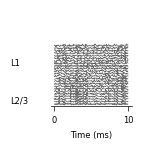

In [4]:
FIGSIZE = (1.05, 1.25)
nsite_per_col = len(col1_site_layers)
Y_MAX = PLOT_Y_PITCH * (nsite_per_col - 1)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0

for contact_i, contact in enumerate(col1_site_ix):

    # layer 2/3
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L2/3"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L1"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # all other traces
    if contact_i in col1_site_l1:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH

    if contact_i in col1_site_l2_3:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH


print("number of sites shown:", c_site)

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-90, Y_MAX + 600])
plt.yticks([])

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2e_spacetime_vivo_horv_l1_2_3.svg",
        **savefig_cfg
    )

## L4 and 5

### Load dataset

In [5]:
if SAVE_FIG_DATA:

    Recording = si.load_extractor(PRE_PATH_2)
    layers = Recording.get_property("layers")
    prep_traces = Recording.get_traces()
    
    fig_data = {
        "trace": prep_traces[PERIOD, :],
        "layers": layers
    }
    
    # save figure data
    np.save(fig_data_paths["fig2k_spacetime_vivo_horv_l4_5"], fig_data)    

elif LOAD_FIG_DATA:
    fig_data = np.load(fig_data_paths["fig2k_spacetime_vivo_horv_l4_5"], allow_pickle=True).item()        


In [6]:
# from bottom to top on the plot    
col1_site_ix = np.arange(0, len(fig_data["layers"]), 4)
col1_site_layers = fig_data["layers"][col1_site_ix]
col1_site_layers = np.flip(col1_site_layers)
col1_site_l4 = np.where(col1_site_layers == "L4")[0]
col1_site_l5 = np.where(col1_site_layers == "L5")[0]

number of sites shown: 27


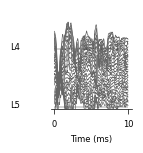

In [7]:
N_SITES = 17
FIGSIZE = (1.05, 1.3)  # DO NOT CHANGE!! Calibrated for figure
PLOT_Y_PITCH = 100
DURATION = 10  # 20  # in ms, 46
nsite_per_col = len(col1_site_layers)
Y_MAX = PLOT_Y_PITCH * (nsite_per_col - 1)

# plot *************************

# plot 384 contacts x 5 ms (like Trautmann et al 2023)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0

for contact_i, contact in enumerate(col1_site_ix):

    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L5"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L4"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # all other traces
    if contact_i in col1_site_l4:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH

    elif contact_i in col1_site_l5:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH

print("number of sites shown:", c_site)

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-90, Y_MAX + 600])
plt.yticks([])

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2e_spacetime_vivo_horv_l4_5.svg", **savefig_cfg
    )

## L6

In [8]:
if SAVE_FIG_DATA:

    Recording = si.load_extractor(PRE_PATH_3)
    layers = Recording.get_property("layers")
    prep_traces = Recording.get_traces()
    
    fig_data = {
        "trace": prep_traces[PERIOD, :],
        "layers": layers
    }
    # save figure data
    np.save(fig_data_paths["fig2k_spacetime_vivo_horv_l6"], fig_data)
elif LOAD_FIG_DATA:
    fig_data = np.load(fig_data_paths["fig2k_spacetime_vivo_horv_l6"], allow_pickle=True).item()    
    

In [9]:
# from bottom to top on the plot
col1_site_ix = np.arange(0, len(fig_data["layers"]), 4)
col1_site_layers = fig_data["layers"][col1_site_ix]
col1_site_layers = np.flip(col1_site_layers)
col1_site_l6 = np.where(col1_site_layers == "L6")[0]

number of sites shown: 17


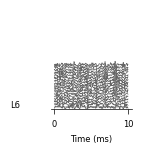

In [10]:
FIGSIZE = (1.05, 1.3)  # DO NOT CHANGE!! Calibrated for figure

PLOT_Y_PITCH = 100
DURATION = 10  # 20  # in ms, 46
nsite_per_col = len(col1_site_layers)
Y_MAX = PLOT_Y_PITCH * (nsite_per_col - 1)
N_SITES = 16

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0


for contact_i, contact in enumerate(col1_site_ix):
    # mark the first trace of each layer
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L6"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # all other traces
    if contact_i in col1_site_l6:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, col1_site_ix[contact_i]] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_V,
        )
        pos_up += PLOT_Y_PITCH

print("number of sites shown:", c_site)

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-90, Y_MAX + 600])
plt.yticks([])

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2e_spacetime_vivo_horv_l6.svg", **savefig_cfg
    )